In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
walk = pd.read_csv('/Users/Pawan Kumar/Downloads/run_or_walk.csv')

In [4]:
walk

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


# '''Load the kinematics dataset as measured on mobile sensors from the file “run_or_walk.csv”. List out the columns in the dataset'''
walk.columns

In [28]:
walk.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [15]:
#Let the target variable ‘y’ be the activity and assign all the columns after it to ‘x’
y = walk.activity
x = walk.drop(['activity','date','time','username'], axis =1)

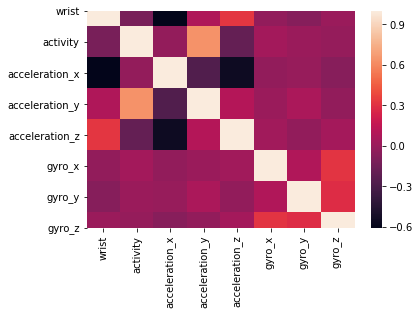

In [20]:
sns.heatmap(walk.corr())

In [21]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [22]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 8380, test_size =0.30)

In [25]:
gnb.fit(x_train, y_train)
# mnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
# mnb_pred = mnb.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report
print(accuracy_score(y_test, gnb_pred))
print(r2_score(y_test, gnb_pred))
print(confusion_matrix(y_test, gnb_pred))
print(classification_report(y_test, gnb_pred))

0.9558264664935847
0.8232963532957712
[[13063   128]
 [ 1046 12340]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13191
           1       0.99      0.92      0.95     13386

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



# '''Repeat the model once using only the acceleration values as predictors and then using only the gyro values as predictors. Comment on the difference in accuracy between both the models.'''

In [30]:
x_1 = walk[['acceleration_x','acceleration_y', 'acceleration_z']]
x_2 = walk[['gyro_x', 'gyro_y', 'gyro_z']]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y, random_state = 8380, test_size =0.30)

In [32]:
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
print(accuracy_score(y_test, gnb_pred))
print(r2_score(y_test, gnb_pred))
print(confusion_matrix(y_test, gnb_pred))
print(classification_report(y_test, gnb_pred))

0.9569552620687061
0.827811778680036
[[13112    79]
 [ 1065 12321]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     13191
           1       0.99      0.92      0.96     13386

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_2,y, random_state = 8380, test_size =0.30)

In [34]:
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
print(accuracy_score(y_test, gnb_pred))
print(r2_score(y_test, gnb_pred))
print(confusion_matrix(y_test, gnb_pred))
print(classification_report(y_test, gnb_pred))

0.644843285547654
-0.4207033400691784
[[9785 3406]
 [6033 7353]]
              precision    recall  f1-score   support

           0       0.62      0.74      0.67     13191
           1       0.68      0.55      0.61     13386

    accuracy                           0.64     26577
   macro avg       0.65      0.65      0.64     26577
weighted avg       0.65      0.64      0.64     26577



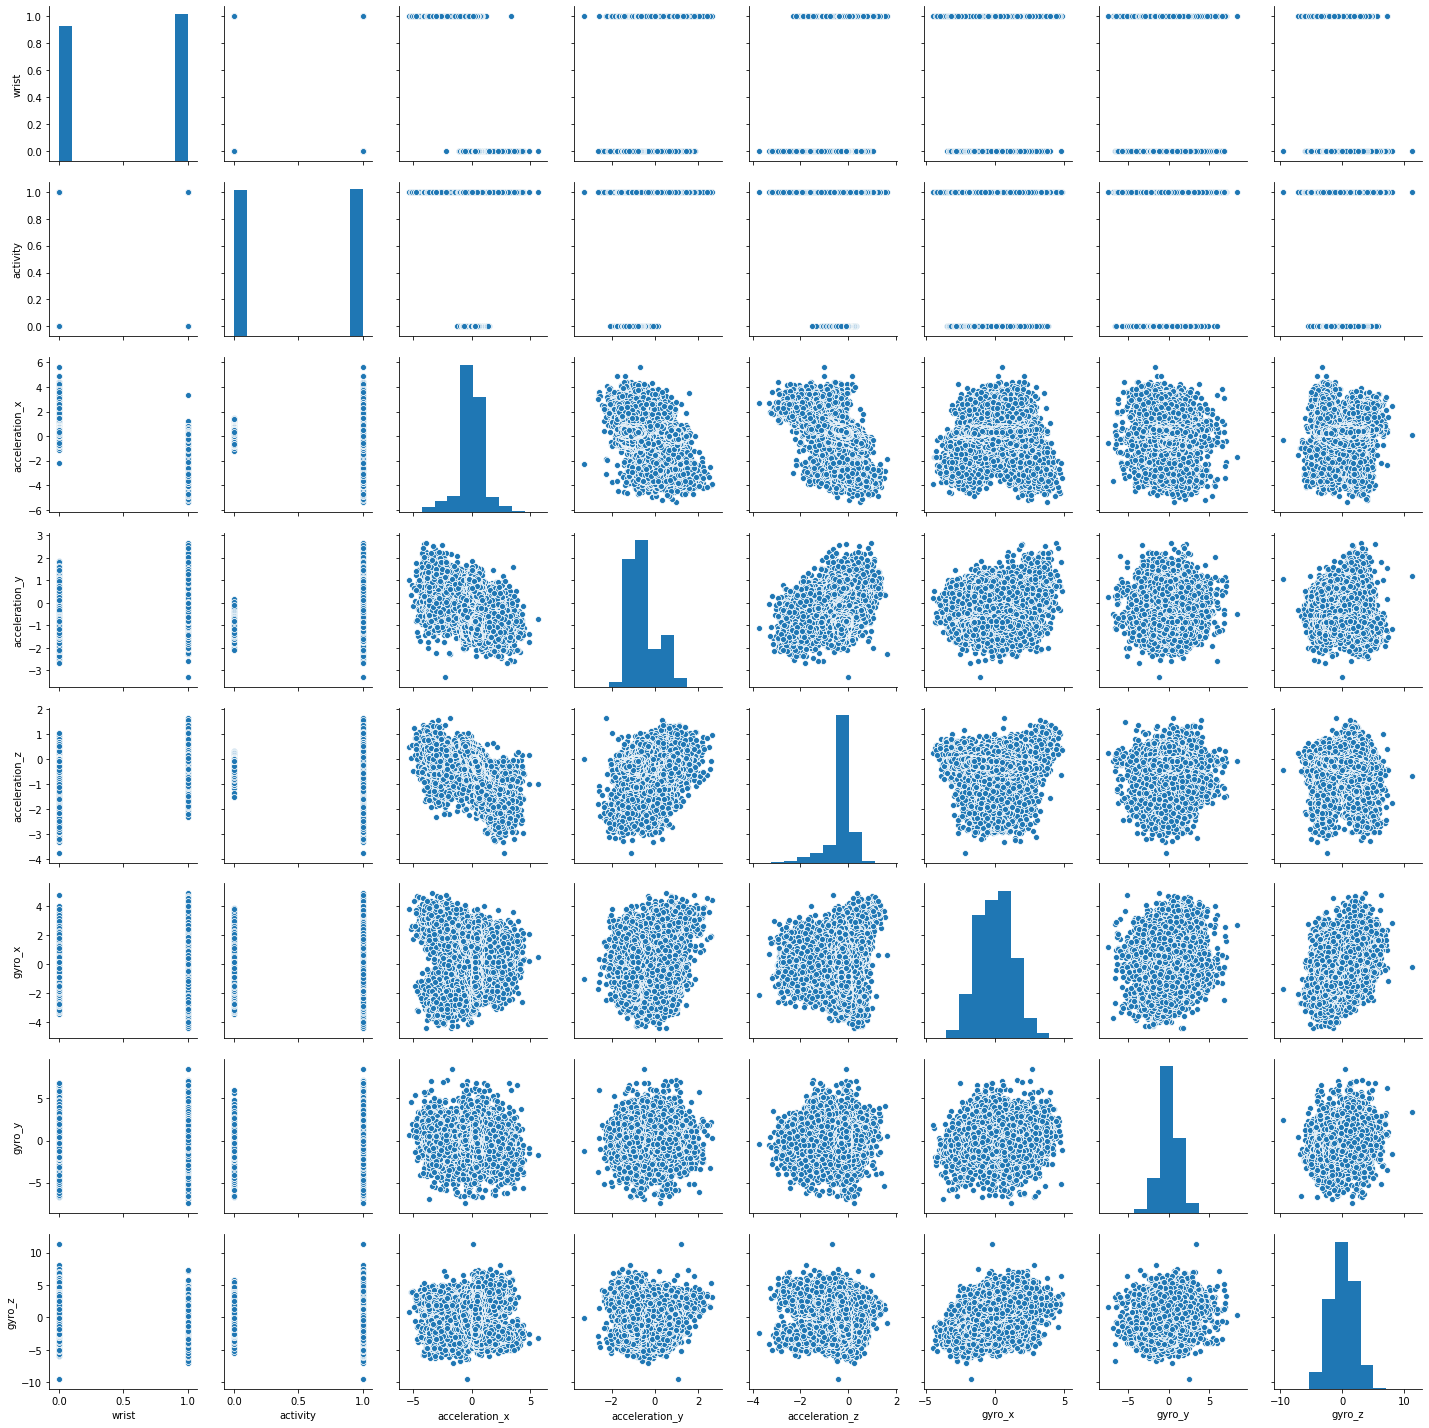

In [35]:
sns.pairplot(walk.iloc[:200,:], hue='activity')

# Ans: - The model using accelaraion was more accuarte than only using gyro

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


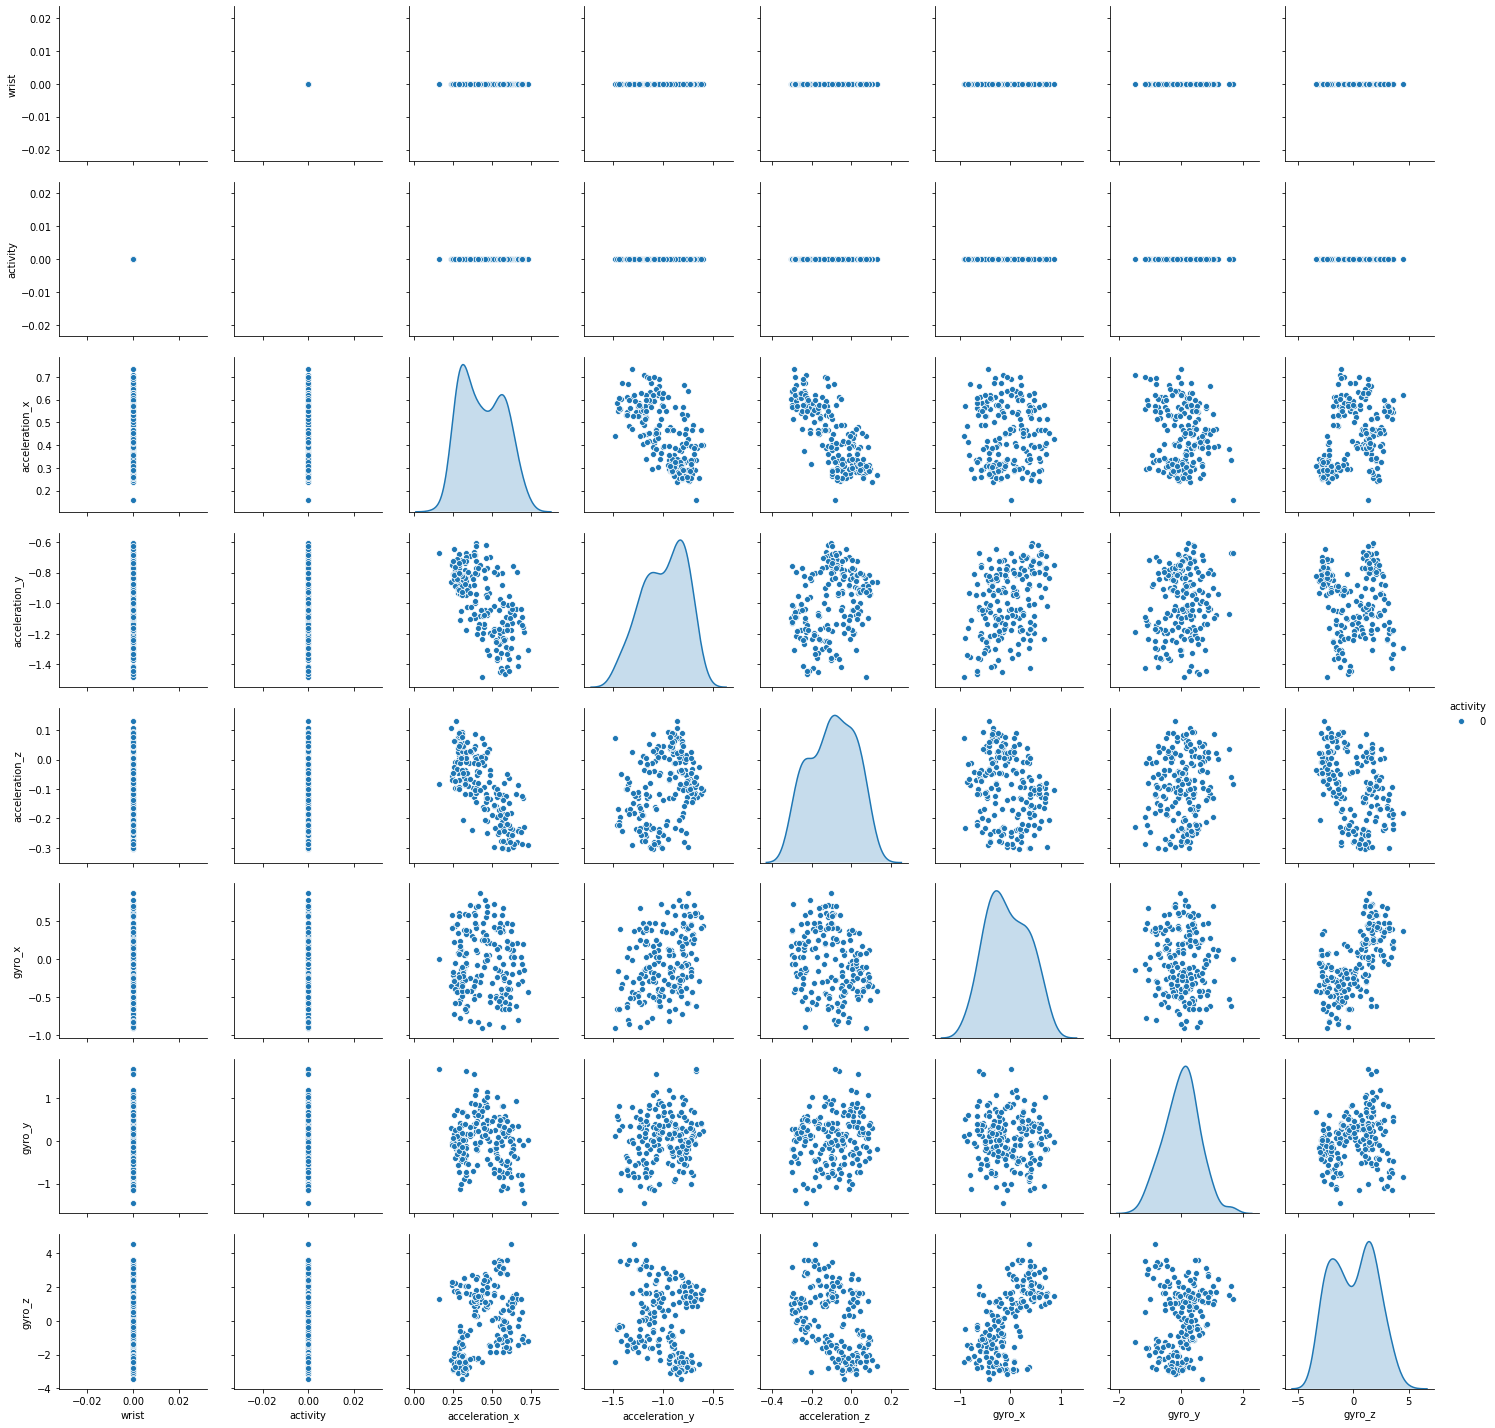

In [36]:
sns.pairplot(walk.iloc[:200,:], hue='activity')